# Census training data analysis

Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load data set

In [5]:
census_train = pd.read_excel('Copy of censusTrain.xlsx', index_col = 0)

In [6]:
# train and test data set info, notice missing values, 6 numerical columns, 9 catigorical columns 
census_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 1 to 32561
Data columns (total 15 columns):
age               32561 non-null int64
work_class        30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [7]:
census_train['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [8]:
census_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# test data set has features only with missing values
census_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 32562 to 48842
Data columns (total 15 columns):
age               16281 non-null int64
work_class        15318 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        15315 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16007 non-null object
income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


In [9]:
# Label the target column with 0 and 1
census_train['income'] = census_train['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [10]:
census_train.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
id,,,,,,,,,,,,,,,
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# use scalar to unify the numberical columns
numerical_col = ["age", "fnlwgt", "education_num", "capital_gain","capital_loss", "hours_per_week"]

In [13]:
scaler = StandardScaler()
census_train[numerical_col] = scaler.fit_transform(census_train[numerical_col])
census_test[numerical_col] = scaler.transform(census_test[numerical_col])

In [15]:
#clean the data: get rid of missing values
census_train = census_train.replace('', np.nan).dropna()
census_test = census_test.replace('', np.nan).dropna()

In [16]:
census_train.columns

Index(['age', 'work_class', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [17]:
#notice the education is highly correlated to education_num, define the category columns to keep and drop 'education' in feature  
cat_feats = [ 'work_class', 'marital_status', 'occupation', 'relationship', 'race', 'sex','native_country']

In [20]:
train_X = census_train.drop(['education','income'], axis = 1)
train_y = census_train['income']
train_X = pd.get_dummies(train_X,columns=cat_feats,drop_first=True)
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32561
Data columns (total 81 columns):
age                                          30162 non-null float64
fnlwgt                                       30162 non-null float64
education_num                                30162 non-null float64
capital_gain                                 30162 non-null float64
capital_loss                                 30162 non-null float64
hours_per_week                               30162 non-null float64
work_class_Local-gov                         30162 non-null uint8
work_class_Private                           30162 non-null uint8
work_class_Self-emp-inc                      30162 non-null uint8
work_class_Self-emp-not-inc                  30162 non-null uint8
work_class_State-gov                         30162 non-null uint8
work_class_Without-pay                       30162 non-null uint8
marital_status_Married-AF-spouse             30162 non-null uint8
marital_status_Marrie

In [23]:
train_X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
id,,,,,,,,,,,,,,,,,,,,,
1,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train_y.value_counts()

0    22654
1     7508
Name: income, dtype: int64

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y, test_size=0.30,random_state = 100)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21113 entries, 18554 to 6139
Data columns (total 81 columns):
age                                          21113 non-null float64
fnlwgt                                       21113 non-null float64
education_num                                21113 non-null float64
capital_gain                                 21113 non-null float64
capital_loss                                 21113 non-null float64
hours_per_week                               21113 non-null float64
work_class_Local-gov                         21113 non-null uint8
work_class_Private                           21113 non-null uint8
work_class_Self-emp-inc                      21113 non-null uint8
work_class_Self-emp-not-inc                  21113 non-null uint8
work_class_State-gov                         21113 non-null uint8
work_class_Without-pay                       21113 non-null uint8
marital_status_Married-AF-spouse             21113 non-null uint8
marital_status_Mar

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(final_train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[6751    0]
 [   1 2297]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      6751
          1       1.00      1.00      1.00      2298

avg / total       1.00      1.00      1.00      9049



In [33]:
error_rate = []

# Will take some time
for i in range(1,40,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

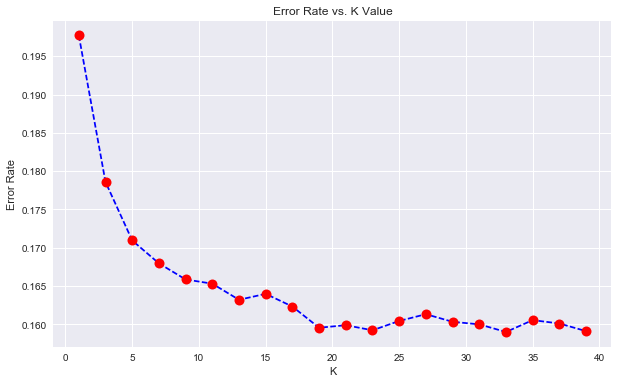

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
#with K = 18
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=18


[[6230  521]
 [ 939 1359]]


             precision    recall  f1-score   support

          0       0.87      0.92      0.90      6751
          1       0.72      0.59      0.65      2298

avg / total       0.83      0.84      0.83      9049



# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier()

In [38]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Predict and evaluation:

In [39]:
pred = dtree.predict(X_test)

In [40]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[5845  906]
 [ 851 1447]]


             precision    recall  f1-score   support

          0       0.87      0.87      0.87      6751
          1       0.61      0.63      0.62      2298

avg / total       0.81      0.81      0.81      9049



# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [42]:
rfc_pred = rfc.predict(X_test)

In [43]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[6258  493]
 [ 853 1445]]


             precision    recall  f1-score   support

          0       0.88      0.93      0.90      6751
          1       0.75      0.63      0.68      2298

avg / total       0.85      0.85      0.85      9049



# Support Vector Machines

In [44]:
# Train the Support Vector Classifier
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Predictions and Evaluations

In [45]:
predictions = model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[6317  434]
 [ 953 1345]]


             precision    recall  f1-score   support

          0       0.87      0.94      0.90      6751
          1       0.76      0.59      0.66      2298

avg / total       0.84      0.85      0.84      9049



Gridsearch: finding right parameters

In [47]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']} 

In [50]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [52]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.3min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  59.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  18.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  18.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  17.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  20.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  20.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 37.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [53]:
grid.best_params_


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [54]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
grid_predictions = grid.predict(X_test)

In [56]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[6308  443]
 [ 931 1367]]


             precision    recall  f1-score   support

          0       0.87      0.93      0.90      6751
          1       0.76      0.59      0.67      2298

avg / total       0.84      0.85      0.84      9049

